# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
from keras.datasets import cifar10

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
train, test = cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, num_outputs = 10, num_neurons = [512,256,128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for i, num_neuron in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = num_neuron, activation = "relu", name = "Hidden_layer"+str(i))(input_layer)
        else:
            x = keras.layers.Dense(units = num_neuron, activation = "relu", name = "Hidden_layer"+str(i))(x)
    
    out = keras.layers.Dense(units = num_outputs, activation = "softmax", name = "Output_layer")(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for i in LEARNING_RATE:
    keras.backend.clear_session()
    model = build_mlp(x_train.shape[1:])
    model.summary()
    ADAM = keras.optimizers.Adam(learning_rate=i)
    model.compile(loss = "categorical_crossentropy", optimizer=ADAM, metrics=["accuracy"])
    model.fit(x_train,y_train,
            batch_size=BATCH_SIZE,
            epochs=EPOCHS,
            validation_data=(x_test, y_test),
            shuffle=True)

    train_loss = model.history.history["loss"]
    train_acc = model.history.history["accuracy"]
    valid_loss = model.history.history["val_loss"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name = f"lr-{i}"
    results[exp_name] = {"train_loss":train_loss,
                        "train_acc":train_acc,
                        "valid_loss":valid_loss,
                        "valid_acc":valid_acc}

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 Hidden_layer0 (Dense)       (None, 512)               1573376   
                                                                 
 Hidden_layer1 (Dense)       (None, 256)               131328    
                                                                 
 Hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 Output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================]

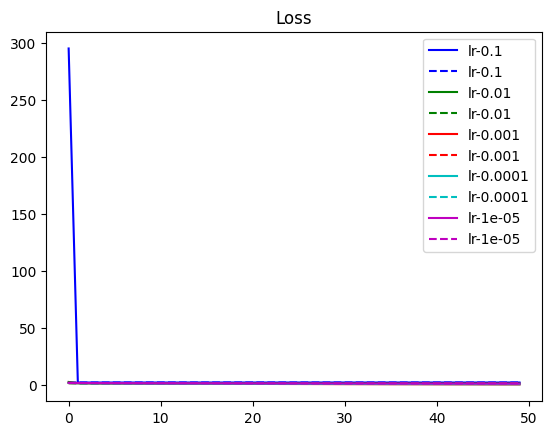

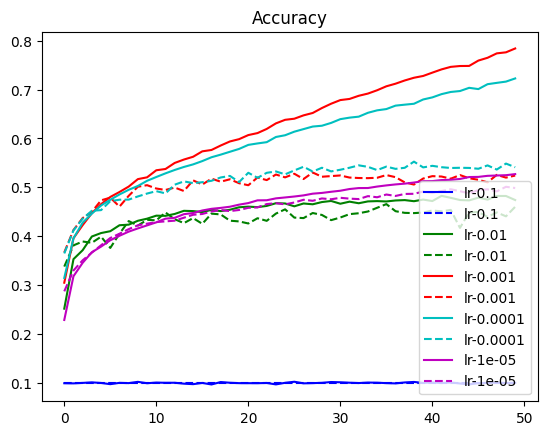

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
clr = ["b","g","r","c","m"]
for i,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_loss"])), results[cond]["train_loss"], "-", label = cond, c = clr[i])
    plt.plot(range(len(results[cond]["valid_loss"])), results[cond]["valid_loss"], "--", label = cond, c = clr[i])
plt.title("Loss")
plt.legend()
plt.show()


for i,cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_acc"])), results[cond]["train_acc"], "-", label = cond, c = clr[i])
    plt.plot(range(len(results[cond]["valid_acc"])), results[cond]["valid_acc"], "--", label = cond, c = clr[i])
plt.title("Accuracy")
plt.legend()
plt.show()


In [10]:
for i,cond in enumerate(results.keys()):
    print(i)
    print(cond)

0
lr-0.1
1
lr-0.01
2
lr-0.001
3
lr-0.0001
4
lr-1e-05
